In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')

In [4]:
train.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


In [5]:
train.isnull().sum()

date_time              0
is_holiday             0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
air_pollution_index    0
traffic_volume         0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

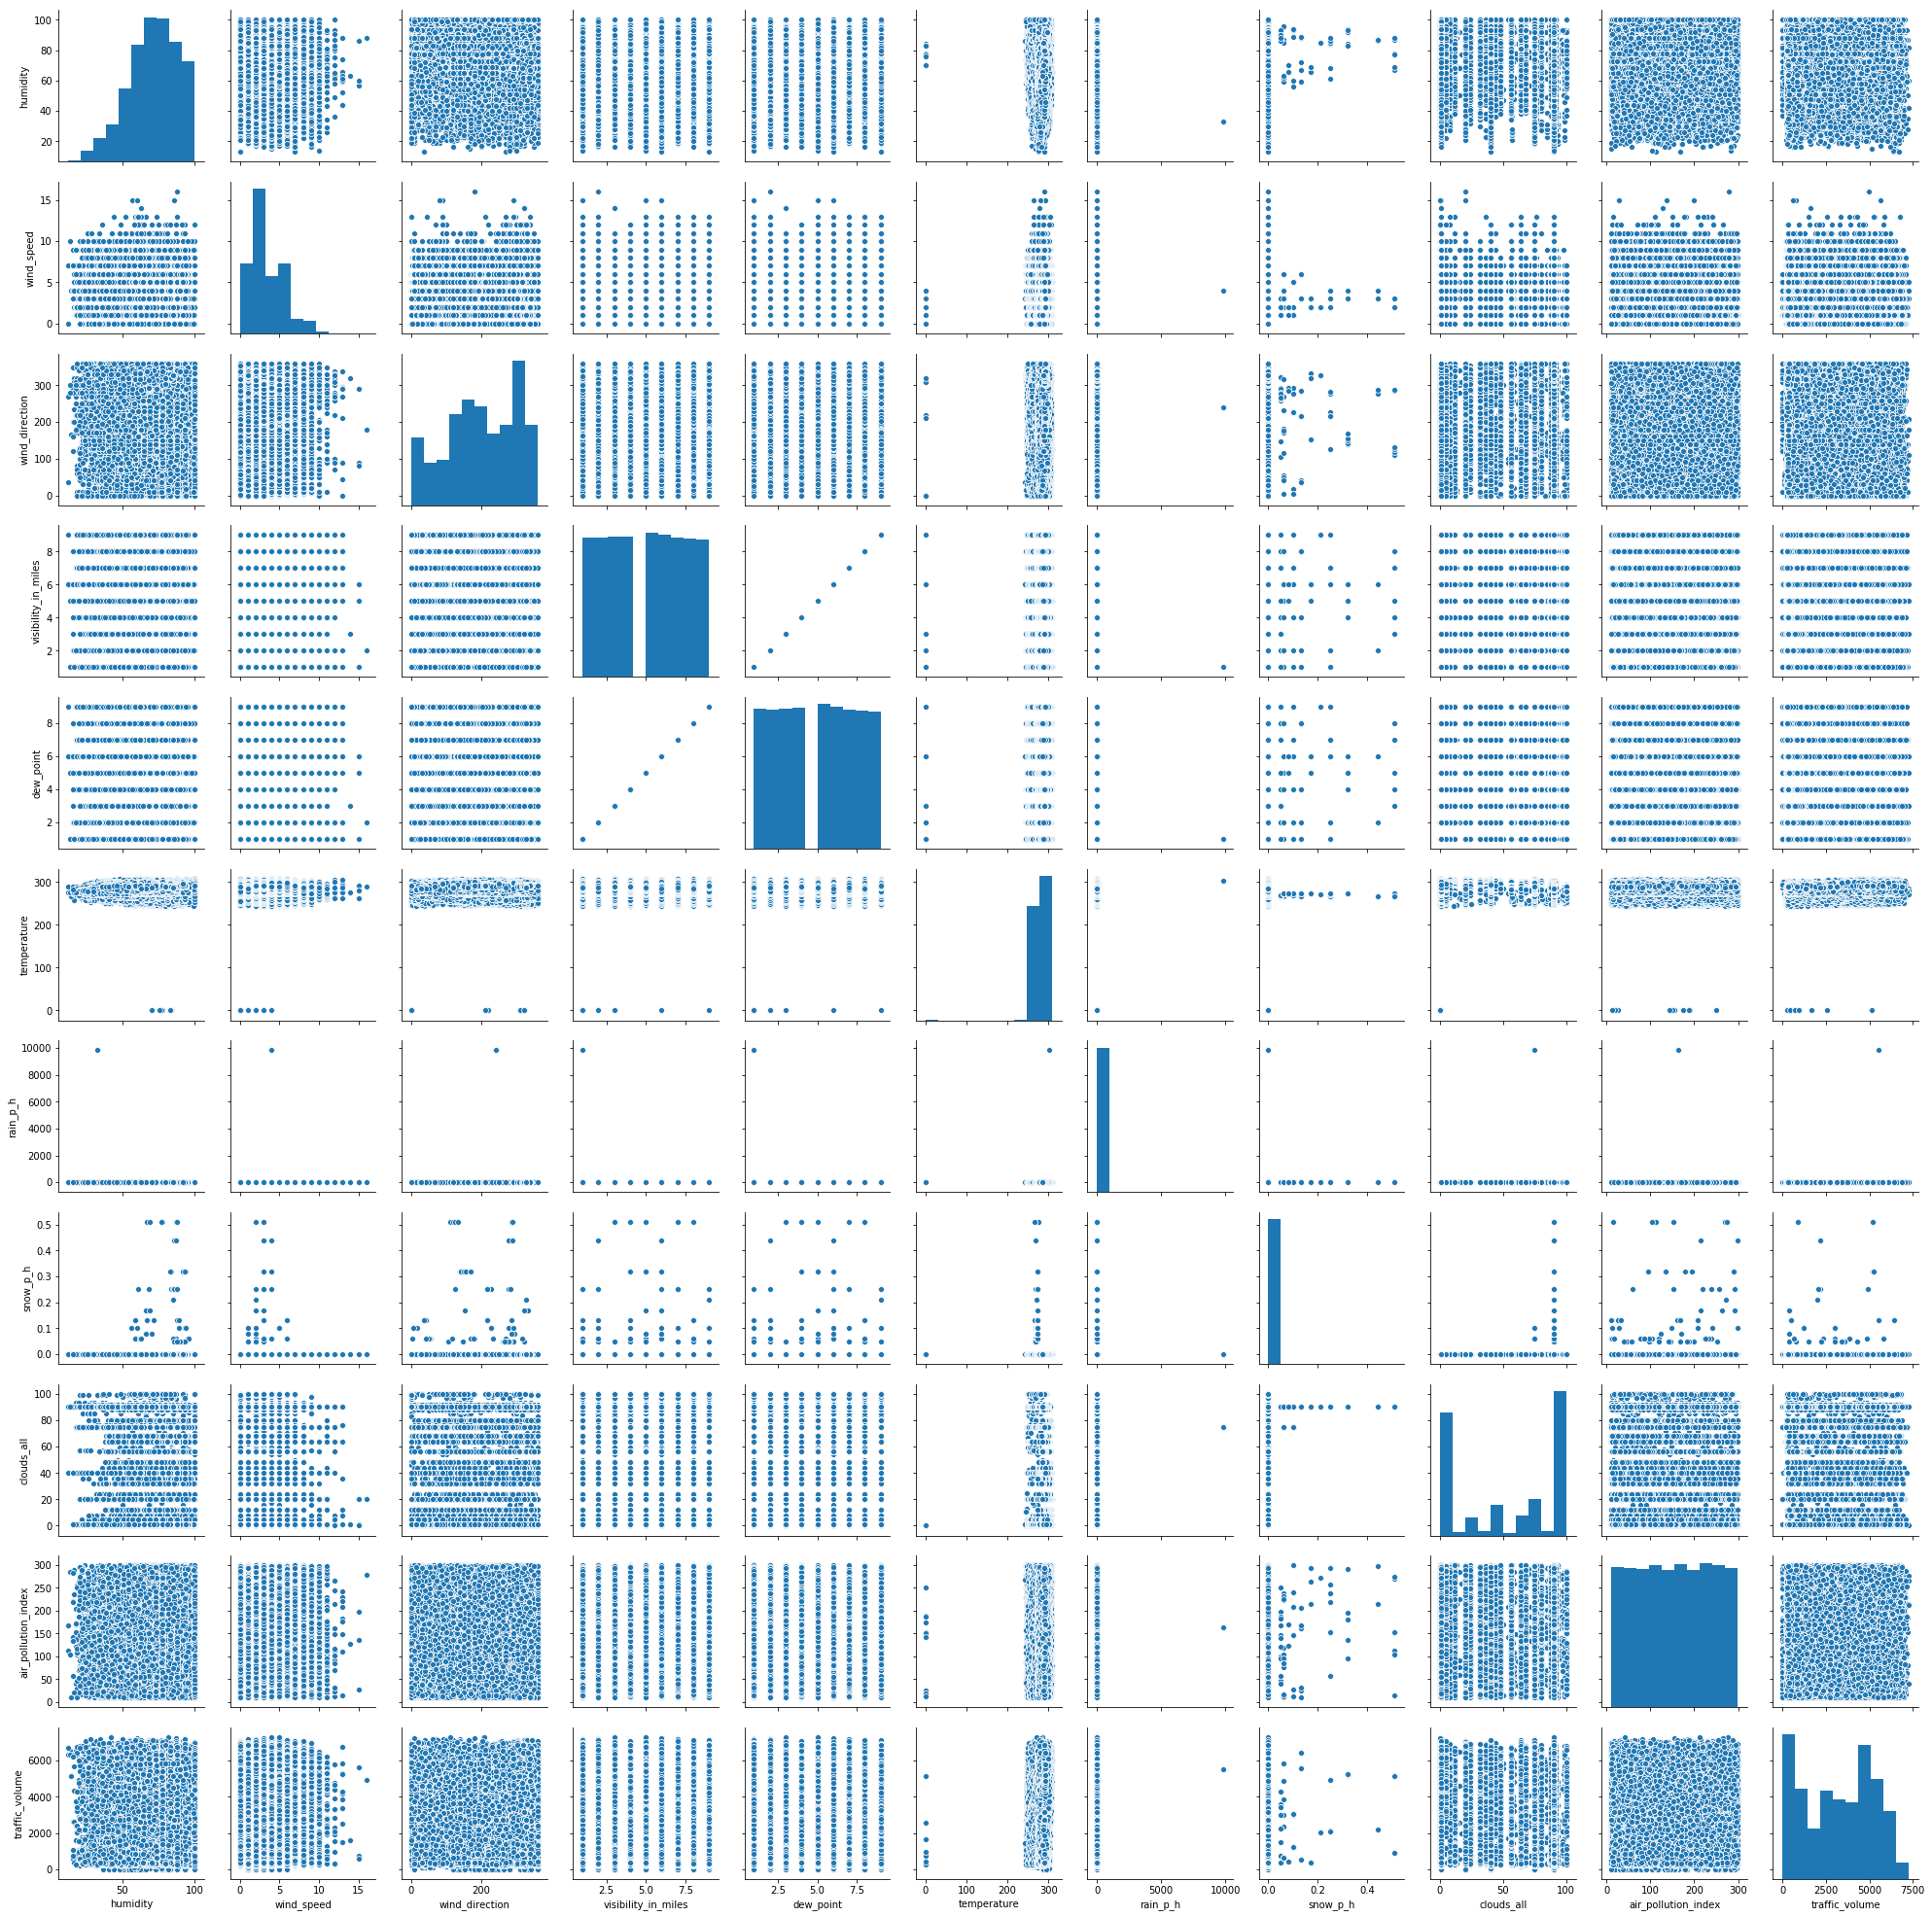

In [7]:
sns.pairplot(train)

In [8]:
train.is_holiday.unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
la = LabelEncoder()
la2 = LabelEncoder()

In [12]:
total = train.append(test, sort=False)

In [13]:
total

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121.0,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178.0,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113.0,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20.0,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281.0,4918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14449,2018-09-30 19:00:00,None,21,4,345,4,4,283.45,0.0,0.0,75,Clouds,NaN,3543
14450,2018-09-30 20:00:00,None,95,8,280,6,6,282.76,0.0,0.0,90,Clouds,NaN,2781
14451,2018-09-30 21:00:00,None,63,4,238,1,1,282.73,0.0,0.0,90,Thunderstorm,NaN,2159
14452,2018-09-30 22:00:00,None,57,8,268,7,7,282.09,0.0,0.0,90,Clouds,NaN,1450


In [15]:
total['enc_hol'] = la.fit_transform(total['is_holiday'])
total['enc_weather'] = la2.fit_transform(total['weather_type'])

In [16]:
total.head()

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume,enc_hol,enc_weather
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121.0,5545,7,1
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178.0,4516,7,1
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113.0,4767,7,1
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20.0,5026,7,1
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281.0,4918,7,1


In [18]:
train = total[~total['air_pollution_index'].isna()].reset_index()
test = total[total['air_pollution_index'].isna()].reset_index()

In [19]:
train.shape, test.shape

((33750, 17), (14454, 17))

In [20]:
from sklearn.model_selection import train_test_split

In [26]:
X = [x for x in train.columns if x not in ['index', 'date_time', 'is_holiday', 'weather_type', 'air_pollution_index']]
y = ['air_pollution_index']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train[X], train[y], test_size=0.33, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestRegressor
import lightgbm
import catboost

In [32]:
rf = RandomForestRegressor()
lgt = lightgbm.LGBMRegressor()
cat = catboost.CatBoostRegressor()

In [33]:
rf.fit(X_train, y_train)
lgt.fit(X_train, y_train)
cat.fit(X_train, y_train)

C:\Users\EW\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
e:\python36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Learning rate set to 0.067994
0:	learn: 83.6366750	total: 91.2ms	remaining: 1m 31s
1:	learn: 83.6219257	total: 103ms	remaining: 51.3s
2:	learn: 83.6154417	total: 112ms	remaining: 37.2s
3:	learn: 83.6031685	total: 119ms	remaining: 29.5s
4:	learn: 83.5893354	total: 127ms	remaining: 25.3s
5:	learn: 83.5778602	total: 135ms	remaining: 22.3s
6:	learn: 83.5676812	total: 143ms	remaining: 20.3s
7:	learn: 83.5598478	total: 149ms	remaining: 18.5s
8:	learn: 83.5520138	total: 158ms	remaining: 17.4s
9:	learn: 83.5435565	total: 166ms	remaining: 16.4s
10:	learn: 83.5372925	total: 174ms	remaining: 15.7s
11:	learn: 83.5331036	total: 181ms	remaining: 14.9s
12:	learn: 83.5254166	total: 192ms	remaining: 14.6s
13:	learn: 83.5158076	total: 205ms	remaining: 14.4s
14:	learn: 83.5062453	total: 212ms	remaining: 13.9s
15:	learn: 83.4920016	total: 223ms	remaining: 13.7s
16:	learn: 83.4815059	total: 231ms	remaining: 13.3s
17:	learn: 83.4741482	total: 239ms	remaining: 13s
18:	learn: 83.4668144	total: 246ms	remaining

165:	learn: 82.3493339	total: 1.48s	remaining: 7.45s
166:	learn: 82.3373562	total: 1.49s	remaining: 7.45s
167:	learn: 82.3272297	total: 1.5s	remaining: 7.45s
168:	learn: 82.3130724	total: 1.51s	remaining: 7.45s
169:	learn: 82.3020943	total: 1.52s	remaining: 7.43s
170:	learn: 82.2902609	total: 1.53s	remaining: 7.42s
171:	learn: 82.2887249	total: 1.54s	remaining: 7.42s
172:	learn: 82.2746306	total: 1.55s	remaining: 7.44s
173:	learn: 82.2656410	total: 1.57s	remaining: 7.45s
174:	learn: 82.2640806	total: 1.58s	remaining: 7.45s
175:	learn: 82.2584370	total: 1.59s	remaining: 7.43s
176:	learn: 82.2433653	total: 1.6s	remaining: 7.44s
177:	learn: 82.2324914	total: 1.61s	remaining: 7.44s
178:	learn: 82.2171468	total: 1.62s	remaining: 7.43s
179:	learn: 82.2095289	total: 1.63s	remaining: 7.45s
180:	learn: 82.1957025	total: 1.64s	remaining: 7.43s
181:	learn: 82.1807211	total: 1.65s	remaining: 7.41s
182:	learn: 82.1643337	total: 1.66s	remaining: 7.4s
183:	learn: 82.1550284	total: 1.67s	remaining: 7.

336:	learn: 80.9074802	total: 2.99s	remaining: 5.88s
337:	learn: 80.9017263	total: 3s	remaining: 5.88s
338:	learn: 80.8934240	total: 3.02s	remaining: 5.88s
339:	learn: 80.8797561	total: 3.02s	remaining: 5.87s
340:	learn: 80.8660722	total: 3.03s	remaining: 5.86s
341:	learn: 80.8517493	total: 3.04s	remaining: 5.86s
342:	learn: 80.8398607	total: 3.05s	remaining: 5.85s
343:	learn: 80.8263081	total: 3.07s	remaining: 5.85s
344:	learn: 80.8158890	total: 3.08s	remaining: 5.84s
345:	learn: 80.8116187	total: 3.08s	remaining: 5.83s
346:	learn: 80.8017924	total: 3.09s	remaining: 5.82s
347:	learn: 80.7920314	total: 3.1s	remaining: 5.81s
348:	learn: 80.7828050	total: 3.11s	remaining: 5.8s
349:	learn: 80.7727899	total: 3.12s	remaining: 5.79s
350:	learn: 80.7655954	total: 3.14s	remaining: 5.8s
351:	learn: 80.7593438	total: 3.15s	remaining: 5.79s
352:	learn: 80.7517790	total: 3.15s	remaining: 5.78s
353:	learn: 80.7431969	total: 3.16s	remaining: 5.77s
354:	learn: 80.7358098	total: 3.18s	remaining: 5.77s

501:	learn: 79.5225505	total: 4.45s	remaining: 4.41s
502:	learn: 79.5141070	total: 4.46s	remaining: 4.4s
503:	learn: 79.5086368	total: 4.47s	remaining: 4.4s
504:	learn: 79.4982332	total: 4.48s	remaining: 4.39s
505:	learn: 79.4944755	total: 4.49s	remaining: 4.38s
506:	learn: 79.4890118	total: 4.5s	remaining: 4.37s
507:	learn: 79.4840970	total: 4.51s	remaining: 4.37s
508:	learn: 79.4787191	total: 4.52s	remaining: 4.36s
509:	learn: 79.4731211	total: 4.53s	remaining: 4.35s
510:	learn: 79.4658425	total: 4.54s	remaining: 4.35s
511:	learn: 79.4576982	total: 4.55s	remaining: 4.34s
512:	learn: 79.4574005	total: 4.56s	remaining: 4.33s
513:	learn: 79.4533981	total: 4.57s	remaining: 4.32s
514:	learn: 79.4466462	total: 4.58s	remaining: 4.31s
515:	learn: 79.4464599	total: 4.59s	remaining: 4.3s
516:	learn: 79.4371588	total: 4.59s	remaining: 4.29s
517:	learn: 79.4277857	total: 4.6s	remaining: 4.28s
518:	learn: 79.4216067	total: 4.61s	remaining: 4.28s
519:	learn: 79.4151068	total: 4.62s	remaining: 4.26

664:	learn: 78.3440009	total: 5.95s	remaining: 3s
665:	learn: 78.3389324	total: 5.96s	remaining: 2.99s
666:	learn: 78.3294597	total: 5.97s	remaining: 2.98s
667:	learn: 78.3289427	total: 5.98s	remaining: 2.97s
668:	learn: 78.3228705	total: 5.99s	remaining: 2.96s
669:	learn: 78.3115158	total: 6s	remaining: 2.95s
670:	learn: 78.3059448	total: 6.01s	remaining: 2.95s
671:	learn: 78.2996921	total: 6.02s	remaining: 2.94s
672:	learn: 78.2926885	total: 6.03s	remaining: 2.93s
673:	learn: 78.2838355	total: 6.04s	remaining: 2.92s
674:	learn: 78.2789489	total: 6.05s	remaining: 2.91s
675:	learn: 78.2705024	total: 6.06s	remaining: 2.9s
676:	learn: 78.2629189	total: 6.07s	remaining: 2.89s
677:	learn: 78.2587749	total: 6.08s	remaining: 2.88s
678:	learn: 78.2506482	total: 6.08s	remaining: 2.88s
679:	learn: 78.2435638	total: 6.1s	remaining: 2.87s
680:	learn: 78.2384061	total: 6.1s	remaining: 2.86s
681:	learn: 78.2288085	total: 6.11s	remaining: 2.85s
682:	learn: 78.2194579	total: 6.12s	remaining: 2.84s
68

833:	learn: 77.2373068	total: 7.49s	remaining: 1.49s
834:	learn: 77.2359225	total: 7.49s	remaining: 1.48s
835:	learn: 77.2315161	total: 7.5s	remaining: 1.47s
836:	learn: 77.2268918	total: 7.51s	remaining: 1.46s
837:	learn: 77.2176768	total: 7.52s	remaining: 1.45s
838:	learn: 77.2131444	total: 7.53s	remaining: 1.45s
839:	learn: 77.2099637	total: 7.54s	remaining: 1.44s
840:	learn: 77.2007478	total: 7.55s	remaining: 1.43s
841:	learn: 77.1942141	total: 7.56s	remaining: 1.42s
842:	learn: 77.1875223	total: 7.58s	remaining: 1.41s
843:	learn: 77.1821675	total: 7.59s	remaining: 1.4s
844:	learn: 77.1767931	total: 7.6s	remaining: 1.39s
845:	learn: 77.1728240	total: 7.61s	remaining: 1.38s
846:	learn: 77.1675254	total: 7.61s	remaining: 1.38s
847:	learn: 77.1593077	total: 7.62s	remaining: 1.37s
848:	learn: 77.1500577	total: 7.63s	remaining: 1.36s
849:	learn: 77.1435852	total: 7.64s	remaining: 1.35s
850:	learn: 77.1358172	total: 7.65s	remaining: 1.34s
851:	learn: 77.1273836	total: 7.66s	remaining: 1.

In [34]:
rf_test = rf.predict(X_test)
lgt_test = lgt.predict(X_test)
cat_test = cat.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
def score(y_true, y_pred):
    x = max(0, (100 - mean_absolute_error(y_true, y_pred)))
    return x

In [37]:
score(y_test, rf_test)

24.03145986712157

In [38]:
score(y_test, lgt_test)

26.729822133691954

In [39]:
score(y_test, cat_test)

26.337437656446014